In [12]:
import pandas as pd

In [13]:
naver = pd.read_csv('/content/drive/MyDrive/딥러닝 공부/연구실 프로젝트 1/naver_data')
steam = pd.read_csv('/content/drive/MyDrive/딥러닝 공부/연구실 프로젝트 1/steam_data')
total = pd.read_csv('/content/drive/MyDrive/딥러닝 공부/연구실 프로젝트 1/total_data')

# 데이터 전처리2
* 영어의 알파뱃, 특수문자를 제거(정규식을 이용)

In [14]:
# 한글이 아닌 것들을 ''으로 바꿈.
naver['데이터'] = naver['데이터'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
steam['데이터'] = steam['데이터'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
total['데이터'] = total['데이터'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

<ipython-input-14-8ea22823620b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  naver['데이터'] = naver['데이터'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
<ipython-input-14-8ea22823620b>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  steam['데이터'] = steam['데이터'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
<ipython-input-14-8ea22823620b>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  total['데이터'] = total['데이터'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [15]:
naver.head(5)

,데이터,label
0,배공빠르고 굿,1
1,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,아주좋아요 바지 정말 좋아서개 더 구매했어요 이가격에 대박입니다 바느질이 조금 엉성...,1
3,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다 전화...,0
4,민트색상 예뻐요 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


* 위의 한글만 제거한 후 공백의 데이터로 됬는지 확인.

In [16]:
naver.isnull().sum(), steam.isnull().sum(), total.isnull().sum()

(데이터      0
 label    0
 dtype: int64,
 데이터      0
 label    0
 dtype: int64,
 데이터      0
 label    0
 dtype: int64)

# 토큰화
* 한국어는 기본적으로 띄어쓰기(어절)만 가지고 토큰화 하기에 부족.
  * 한국어는 교착어
  * '그가', '그에게', '그를', '그와', '그는'과 같은 다양한 조사가 붙음.
  * 조사를 분리시켜줘야함.

## 형태소
* 뜻을 가진 가장 작은 말의 단위.
* 자립 형태소, 의존 형태소
  * 자립 형태소 : 접사, 어미, 조사와 상관없이 자립하여 사용할 수 있는 형태소, 그 자체로 단어.(체언, 수식언, 감탄사)
  * 의존 형태소 : 다른 형태소와 결합하여 사용되는 형태소(접사, 어미, 조사, 어간)

* 예시
  * 문장 : 아버지가 책을 읽었다.
  * 띄어쓰기 단위 토큰화 : `['아버지가', '책을', '읽었다']`
  * 형태소 단위 토큰화
    * 자립 형태소 : 아버지, 책
    * 의존 형태소 : -가, -을, 읽-, -었, -다

* 형태소 단위의 토큰화가 필요.

## 품사 태깅
* 단어 표기는 같지만, 품사에 따라 단어의 의미가 달리짐.
  * 명사 '못' : 망치를 사용해서 목재 따위를 고정하는 물건.
  * 부사 '못' : 동작 동사를 할 수 없다의 의미로 사용됨.
* 단어의 의미를 제대로 파악하기 위해선 어떤 품사로 사용 되었는지 아는 것이 주요 지표가 될 수도 있다.


## KoNLPy
* [Korean natural language processing](https://konlpy.org/ko/latest/)

* 성능 비교표
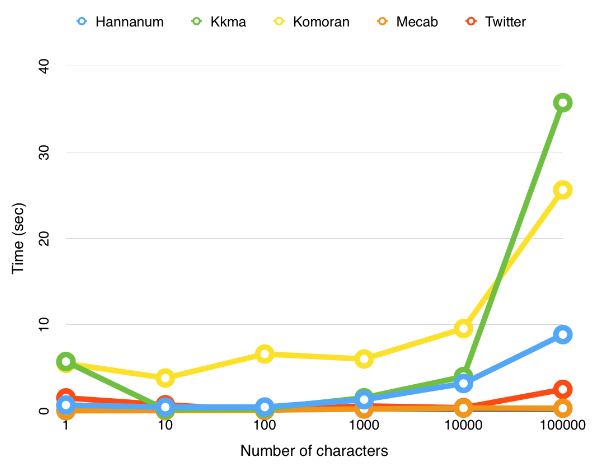

* 성능 분석
* “아이폰 기다리다 지쳐 애플공홈에서 언락폰질러버렸다 6+ 128기가실버ㅋ”에 대한 분석표
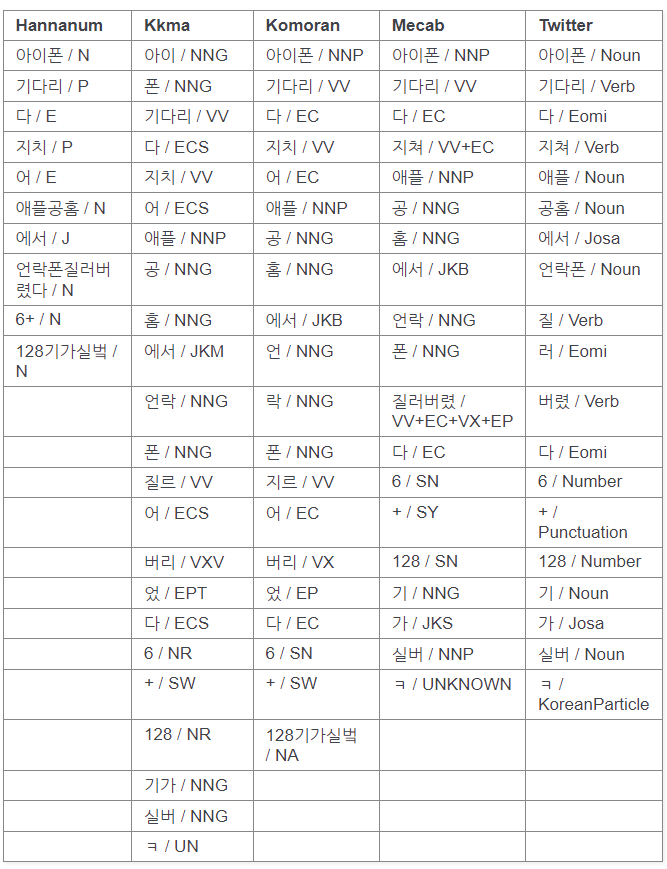

* 성능 및 속도가 적당한 mecab을 사용!

# Colab에 Mecab 설치.

In [17]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
!pip install mecab-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [20]:
from konlpy.tag import Mecab

## 불용어
* 유의미한 단어 토큰만을 선별하기 위해서는 큰 의미가 없다라는 것은 자주 등장하지만, 분석을 하는 것에 큰 도움이 되지 않는 단어들을 말함.
* [보편적으로 선택할 수 있는 한국어 불용어 리스트](https://www.ranks.nl/stopwords/korean)

In [21]:
mecab = Mecab()
# 형태소 분석(토큰화)
naver['tokenized'] = naver['데이터'].apply(mecab.morphs)
steam['tokenized'] = steam['데이터'].apply(mecab.morphs)
total['tokenized'] = total['데이터'].apply(mecab.morphs)

# 불용어 지정.
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

# 불용어 제거
naver['tokenized'] = naver['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
steam['tokenized'] = steam['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
total['tokenized'] = total['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [22]:
naver.head()

,데이터,label,tokenized
0,배공빠르고 굿,1,"[배공, 빠르, 굿]"
1,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0,"[택배, 엉망, 용, 저희, 집, 밑, 층, 말, 없이, 놔두]"
2,아주좋아요 바지 정말 좋아서개 더 구매했어요 이가격에 대박입니다 바느질이 조금 엉성...,1,"[아주, 좋, 아요, 바지, 정말, 좋, 아서, 개, 더, 구매, 했, 어요, 가격..."
3,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다 전화...,0,"[선물, 용, 으로, 빨리, 받, 아서, 전달, 했어야, 상품, 었, 는데, 머그,..."
4,민트색상 예뻐요 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1,"[민트, 색상, 예뻐요, 옆, 손잡이, 거, 용도, 로, 사용, 되, 네요, ㅎㅎ]"


In [23]:
naver.to_csv('/content/drive/MyDrive/딥러닝 공부/연구실 프로젝트 1/naver_token', index=False)
steam.to_csv('/content/drive/MyDrive/딥러닝 공부/연구실 프로젝트 1/steam_token', index=False)
total.to_csv('/content/drive/MyDrive/딥러닝 공부/연구실 프로젝트 1/total_token', index=False)